Md Isahaq Ali 2017331065


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

**Simulation the analog-digital signal using Pulse Code Modulation(PCM)**

##Step-1: Sampling

In [ ]:
#Generate a signal of x(t)= A*sin(2*pi*f*t)

t = np.linspace(0, 3, 300)


def generate_sinusoidal_signal(t, A, f, initial_phase):
  x = A * np.sin(2.0 * np.pi * f * t + initial_phase)
  return x



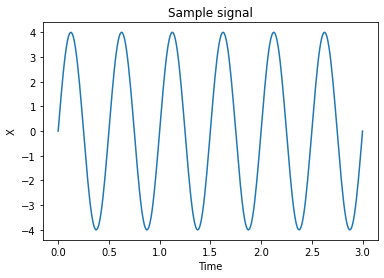

In [ ]:
x = generate_sinusoidal_signal(t, 4, 2, 0)

plt.plot(t, x)
plt.xlabel("Time")
plt.ylabel("X")
plt.title("Sample signal")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


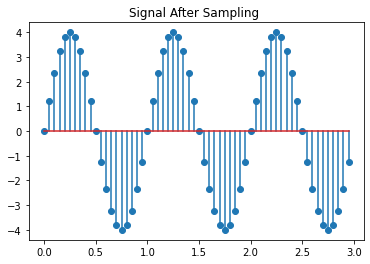

In [ ]:
##fs - sampling frequency that must be 2 times greater than signal frequency



n=5
f=4
fs= n*f
ts=np.arange(0,3,1/fs)

#sampling signal xn

xn=generate_sinusoidal_signal(ts, 4, 1,0)
plt.title('Signal After Sampling ')
plt.stem(ts,xn)
plt.show()

##Step-2 : Quantization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


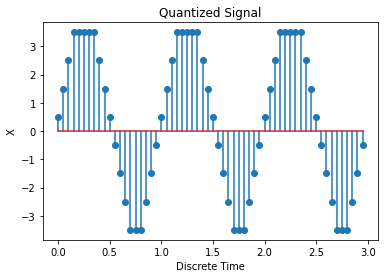

In [ ]:
numBit = 3

numLevel = 2**numBit ##2^3
vmax = 4
vmin= -vmax
difference=(vmax-vmin)/numLevel
quantization=np.arange(vmin,vmax,difference)
cb=np.arange(vmin-(difference/2),vmax+(difference/2),difference) #

xq=np.copy(xn)
encd=np.copy(xn)

for i in range(len(quantization)):
    l=cb[i]
    r=cb[i+1]
    for j in range(len(xn)):
        if(len(quantization)-1 !=i and l <=xs[j] and xs[j] < r):
            xq[j]=quantization[i]
            encd[j]=i
        if(l<=xs[j] and i == len(quantization)-1):
            xq[j]=quantization[i]
            encd[j]=i

for i in range(len(xq)):
    xq[i]= xq[i]+ (difference/2)

plt.stem(ts,xq)
plt.xlabel("Discrete Time")
plt.ylabel("X")
plt.title("Quantized Signal")
plt.show()


##Step-3 Endcoding 

In [ ]:
##decimal to binary converter

def ConverterDecimalToBit(decimal, numOfBit):
    bit = "{0:b}".format(int(decimal))
    if(len(bit) > numOfBit):
      return bit
    extra_zero = numOfBit - len(bit)
    return extra_zero * "0" + bit



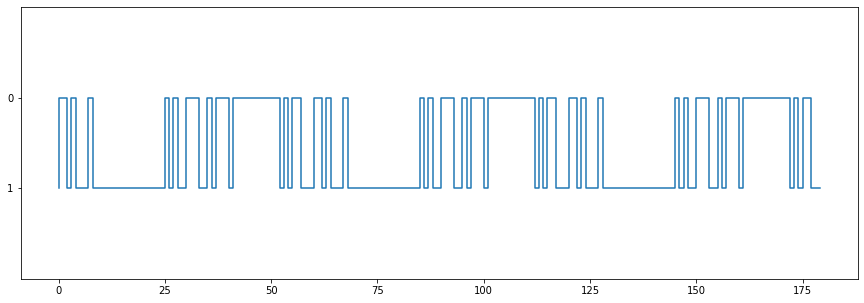

In [ ]:
#plot digital signal
bc = []
for i in range(len(encd)):
    bin = ConverterDecimalToBit(encd[i],numBit)
    for j in range(len(bin)):
        bc.append(bin[j])

ds=np.arange(len(bc))
plt.figure(figsize =(15, 5))
plt.ylim(-1,2)
plt.step(ds,bc)
plt.show()